In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

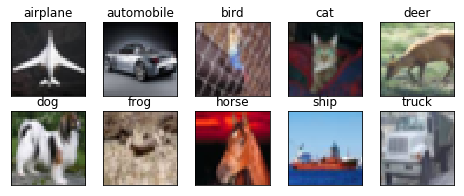

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
def modelDefine():    
    # Define the model
    model = Sequential()
    model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Convolution2D(48, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(96, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(96, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(192, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(192, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0727 14:03:20.452035  6004 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0727 14:03:20.486064  6004 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 14:03:20.492035  6004 deprecation_wrapper.py:119] From C:\Balaji\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launch

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

# Making the code work

In [53]:
def reinit():
    from keras.datasets import cifar10
    (train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
    num_train, img_rows, img_cols,img_channels =  train_features.shape
    num_test, _, _, _ =  test_features.shape
    num_classes = len(np.unique(train_labels))
    train_features = train_features.astype('float32')/255
    test_features = test_features.astype('float32')/255
    # convert class labels to binary class labels
    train_labels = np_utils.to_categorical(train_labels, num_classes)
    test_labels = np_utils.to_categorical(test_labels, num_classes)
    return

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()
W0727 15:15:39.456886  6004 deprecation.py:323] From C:\Balaji\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from te

Epoch 1/100
390/390 [==============================] - 15s 38ms/step - loss: 1.8517 - acc: 0.2913 - val_loss: 1.4701 - val_acc: 0.4531
Epoch 2/100
390/390 [==============================] - 8s 20ms/step - loss: 1.3494 - acc: 0.5088 - val_loss: 1.1510 - val_acc: 0.5902
Epoch 3/100
390/390 [==============================] - 8s 20ms/step - loss: 1.1135 - acc: 0.6066 - val_loss: 0.9962 - val_acc: 0.6432
Epoch 4/100
390/390 [==============================] - 8s 20ms/step - loss: 0.9804 - acc: 0.6573 - val_loss: 0.9384 - val_acc: 0.6691
Epoch 5/100
390/390 [==============================] - 8s 20ms/step - loss: 0.8918 - acc: 0.6899 - val_loss: 0.7682 - val_acc: 0.7370
Epoch 6/100
390/390 [==============================] - 8s 20ms/step - loss: 0.8143 - acc: 0.7181 - val_loss: 0.7662 - val_acc: 0.7379
Epoch 7/100
390/390 [==============================] - 8s 19ms/step - loss: 0.7543 - acc: 0.7399 - val_loss: 0.7460 - val_acc: 0.7409
Epoch 8/100
390/390 [==============================] - 8s 20m

Epoch 62/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2958 - acc: 0.9034 - val_loss: 0.5750 - val_acc: 0.8307
Epoch 63/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2862 - acc: 0.9054 - val_loss: 0.5703 - val_acc: 0.8310
Epoch 64/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2988 - acc: 0.9016 - val_loss: 0.5820 - val_acc: 0.8318
Epoch 65/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2881 - acc: 0.9049 - val_loss: 0.5831 - val_acc: 0.8329
Epoch 66/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2815 - acc: 0.9087 - val_loss: 0.6298 - val_acc: 0.8237
Epoch 67/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2872 - acc: 0.9071 - val_loss: 0.6278 - val_acc: 0.8295
Epoch 68/100
390/390 [==============================] - 8s 20ms/step - loss: 0.2807 - acc: 0.9086 - val_loss: 0.6084 - val_acc: 0.8298
Epoch 69/100
390/390 [==============================] -

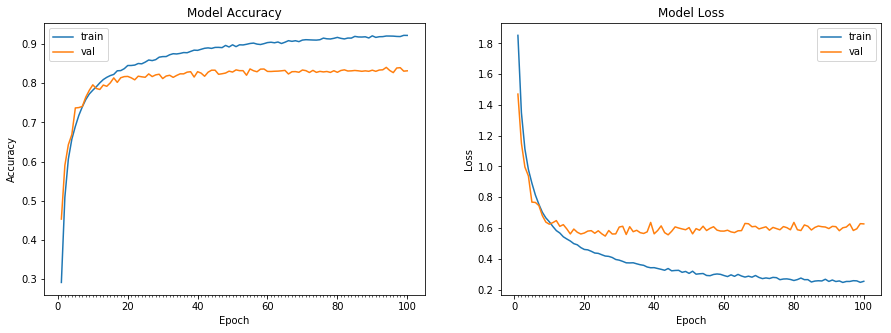

Accuracy on test data is: 83.18


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# After Adding cut out

In [11]:

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

Epoch 1/100
  7/390 [..............................] - ETA: 9s - loss: 1.1316 - acc: 0.7634 

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()


390/390 [==============================] - 8s 20ms/step - loss: 0.6960 - acc: 0.7850 - val_loss: 0.5488 - val_acc: 0.8293
Epoch 2/100
390/390 [==============================] - 8s 20ms/step - loss: 0.6116 - acc: 0.8070 - val_loss: 0.5703 - val_acc: 0.8284
Epoch 3/100
390/390 [==============================] - 8s 19ms/step - loss: 0.5909 - acc: 0.8140 - val_loss: 0.5391 - val_acc: 0.8321
Epoch 4/100
390/390 [==============================] - 8s 19ms/step - loss: 0.5680 - acc: 0.8179 - val_loss: 0.5617 - val_acc: 0.8245
Epoch 5/100
390/390 [==============================] - 8s 19ms/step - loss: 0.5791 - acc: 0.8145 - val_loss: 0.5478 - val_acc: 0.8268
Epoch 6/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5577 - acc: 0.8205 - val_loss: 0.5526 - val_acc: 0.8308
Epoch 7/100
390/390 [==============================] - 8s 20ms/step - loss: 0.5463 - acc: 0.8263 - val_loss: 0.5676 - val_acc: 0.8223
Epoch 8/100
390/390 [==============================] - 8s 19ms/step - loss

Epoch 62/100
390/390 [==============================] - 8s 19ms/step - loss: 0.4804 - acc: 0.8482 - val_loss: 0.5382 - val_acc: 0.8353
Epoch 63/100
390/390 [==============================] - 8s 19ms/step - loss: 0.4884 - acc: 0.8450 - val_loss: 0.5319 - val_acc: 0.8381
Epoch 64/100
390/390 [==============================] - 8s 19ms/step - loss: 0.4824 - acc: 0.8480 - val_loss: 0.5474 - val_acc: 0.8359
Epoch 65/100
390/390 [==============================] - 8s 19ms/step - loss: 0.4826 - acc: 0.8483 - val_loss: 0.5487 - val_acc: 0.8346
Epoch 66/100
390/390 [==============================] - 8s 20ms/step - loss: 0.4802 - acc: 0.8491 - val_loss: 0.5425 - val_acc: 0.8402
Epoch 67/100
390/390 [==============================] - 8s 20ms/step - loss: 0.4850 - acc: 0.8503 - val_loss: 0.5433 - val_acc: 0.8384
Epoch 68/100
390/390 [==============================] - 8s 20ms/step - loss: 0.4730 - acc: 0.8503 - val_loss: 0.5218 - val_acc: 0.8409
Epoch 69/100
390/390 [==============================] -

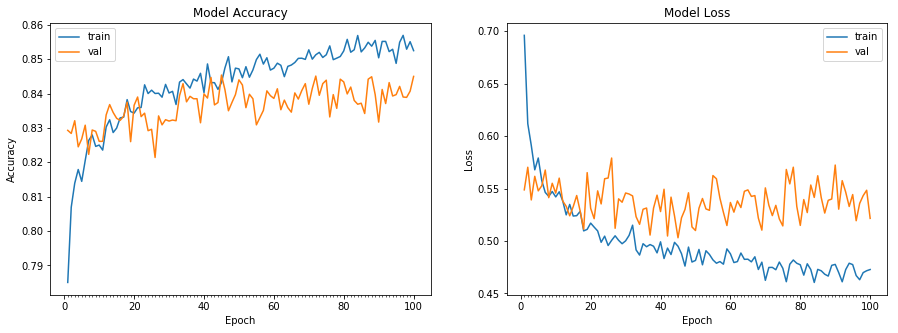

Accuracy on test data is: 84.50


In [12]:
from keras.preprocessing.image import ImageDataGenerator
reinit()
modelDefine()
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Use LR Finder to find the best starting learning rate

In [42]:
class LRFinder(Callback):
    
    '''
    A simple callback for finding the optimal learning rate range for your model + dataset. 
    
    # Usage
        ```python
            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(X_train, Y_train, callbacks=[lr_finder])
            
            lr_finder.plot_loss()
        ```
    
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        epochs: Number of epochs to run experiment. Usually between 2 and 4 epochs is sufficient. 
        
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: https://arxiv.org/abs/1506.01186

    '''
    
    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        newLR = self.min_lr + (self.max_lr-self.min_lr) * x
        print("\nLearning Rate " +str(newLR))
        return newLR
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}                
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)            
        K.set_value(self.model.optimizer.lr, self.clr())
       
        

    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

In [43]:
print(train_features.shape)


(50000, 32, 32, 3)


Epoch 1/3
  1/390 [..............................] - ETA: 10s - loss: 14.9848 - acc: 0.0703
Learning Rate 0.00018516624040920717

Learning Rate 0.00027033248081841435

Learning Rate 0.0003554987212276215
  4/390 [..............................] - ETA: 9s - loss: 14.5755 - acc: 0.0957 
Learning Rate 0.00044066496163682866

Learning Rate 0.0005258312020460359

Learning Rate 0.0006109974424552431
  7/390 [..............................] - ETA: 8s - loss: 14.5171 - acc: 0.0993

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<__main__..., verbose=1, steps_per_epoch=390, epochs=3)`
  # This is added back by InteractiveShellApp.init_path()



Learning Rate 0.0006961636828644502

Learning Rate 0.0007813299232736574

Learning Rate 0.0008664961636828645
 10/390 [..............................] - ETA: 8s - loss: 14.4307 - acc: 0.1047
Learning Rate 0.0009516624040920717

Learning Rate 0.0010368286445012788

Learning Rate 0.001121994884910486
 13/390 [>.............................] - ETA: 8s - loss: 14.4230 - acc: 0.1052
Learning Rate 0.0012071611253196932

Learning Rate 0.0012923273657289003

Learning Rate 0.0013774936061381074
 16/390 [>.............................] - ETA: 8s - loss: 14.3473 - acc: 0.1099
Learning Rate 0.0014626598465473147

Learning Rate 0.0015478260869565218

Learning Rate 0.001632992327365729
 19/390 [>.............................] - ETA: 8s - loss: 14.3618 - acc: 0.1090
Learning Rate 0.001718158567774936

Learning Rate 0.0018033248081841433

Learning Rate 0.0018884910485933504
 22/390 [>.............................] - ETA: 8s - loss: 14.3323 - acc: 0.1108
Learning Rate 0.0019736572890025578

Learning R

139/390 [=========>....................] - ETA: 5s - loss: 14.5092 - acc: 0.0998
Learning Rate 0.011938107416879796

Learning Rate 0.012023273657289002

Learning Rate 0.01210843989769821
142/390 [=========>....................] - ETA: 5s - loss: 14.5086 - acc: 0.0999
Learning Rate 0.012193606138107417

Learning Rate 0.012278772378516623

Learning Rate 0.01236393861892583
145/390 [==========>...................] - ETA: 4s - loss: 14.5054 - acc: 0.1001
Learning Rate 0.012449104859335038

Learning Rate 0.012534271099744245

Learning Rate 0.012619437340153451
148/390 [==========>...................] - ETA: 4s - loss: 14.5024 - acc: 0.1002
Learning Rate 0.012704603580562659

Learning Rate 0.012789769820971866

Learning Rate 0.012874936061381074
151/390 [==========>...................] - ETA: 4s - loss: 14.4986 - acc: 0.1005
Learning Rate 0.012960102301790283

Learning Rate 0.013045268542199487

Learning Rate 0.013130434782608695
154/390 [==========>...................] - ETA: 4s - loss: 14.

271/390 [===================>..........] - ETA: 2s - loss: 14.5034 - acc: 0.1002
Learning Rate 0.02318005115089514

Learning Rate 0.023265217391304348

Learning Rate 0.023350383631713555
274/390 [====================>.........] - ETA: 2s - loss: 14.4972 - acc: 0.1006
Learning Rate 0.023435549872122763

Learning Rate 0.023520716112531967

Learning Rate 0.023605882352941174
277/390 [====================>.........] - ETA: 2s - loss: 14.5002 - acc: 0.1004
Learning Rate 0.023691048593350385

Learning Rate 0.023776214833759593

Learning Rate 0.0238613810741688
280/390 [====================>.........] - ETA: 2s - loss: 14.4986 - acc: 0.1005
Learning Rate 0.023946547314578005

Learning Rate 0.024031713554987212

Learning Rate 0.02411687979539642
283/390 [====================>.........] - ETA: 2s - loss: 14.5007 - acc: 0.1003
Learning Rate 0.024202046035805627

Learning Rate 0.024287212276214835

Learning Rate 0.02437237851662404
286/390 [=====================>........] - ETA: 2s - loss: 14.501

142/390 [=========>....................] - ETA: 4s - loss: 14.4797 - acc: 0.1017
Learning Rate 0.045408439897698216

Learning Rate 0.04549360613810742

Learning Rate 0.04557877237851663
145/390 [==========>...................] - ETA: 4s - loss: 14.4754 - acc: 0.1019
Learning Rate 0.045663938618925835

Learning Rate 0.045749104859335046

Learning Rate 0.04583427109974425
148/390 [==========>...................] - ETA: 4s - loss: 14.4746 - acc: 0.1020
Learning Rate 0.045919437340153454

Learning Rate 0.046004603580562665

Learning Rate 0.04608976982097187
151/390 [==========>...................] - ETA: 4s - loss: 14.4839 - acc: 0.1014
Learning Rate 0.04617493606138108

Learning Rate 0.046260102301790285

Learning Rate 0.04634526854219949
154/390 [==========>...................] - ETA: 4s - loss: 14.4855 - acc: 0.1013
Learning Rate 0.0464304347826087

Learning Rate 0.046515601023017904

Learning Rate 0.046600767263427115
157/390 [===========>..................] - ETA: 4s - loss: 14.4766 -


Learning Rate 0.0678071611253197
 16/390 [>.............................] - ETA: 7s - loss: 14.5330 - acc: 0.0983
Learning Rate 0.06789232736572891

Learning Rate 0.06797749360613811

Learning Rate 0.06806265984654733
 19/390 [>.............................] - ETA: 7s - loss: 14.3989 - acc: 0.1067
Learning Rate 0.06814782608695653

Learning Rate 0.06823299232736574

Learning Rate 0.06831815856777494
 22/390 [>.............................] - ETA: 7s - loss: 14.4445 - acc: 0.1038
Learning Rate 0.06840332480818415

Learning Rate 0.06848849104859336

Learning Rate 0.06857365728900257
 25/390 [>.............................] - ETA: 7s - loss: 14.4489 - acc: 0.1036
Learning Rate 0.06865882352941177

Learning Rate 0.06874398976982098

Learning Rate 0.06882915601023018
 28/390 [=>............................] - ETA: 7s - loss: 14.4613 - acc: 0.1028
Learning Rate 0.0689143222506394

Learning Rate 0.0689994884910486

Learning Rate 0.0690846547314578
 31/390 [=>............................] - E

280/390 [====================>.........] - ETA: 2s - loss: 14.5030 - acc: 0.1002
Learning Rate 0.0903762148337596

Learning Rate 0.0904613810741688

Learning Rate 0.09054654731457801
283/390 [====================>.........] - ETA: 2s - loss: 14.5018 - acc: 0.1003
Learning Rate 0.09063171355498723

Learning Rate 0.09071687979539643

Learning Rate 0.09080204603580563
286/390 [=====================>........] - ETA: 2s - loss: 14.5034 - acc: 0.1002
Learning Rate 0.09088721227621484

Learning Rate 0.09097237851662406

Learning Rate 0.09105754475703326
289/390 [=====================>........] - ETA: 2s - loss: 14.4997 - acc: 0.1004
Learning Rate 0.09114271099744246

Learning Rate 0.09122787723785167

Learning Rate 0.09131304347826087
292/390 [=====================>........] - ETA: 1s - loss: 14.4973 - acc: 0.1006
Learning Rate 0.09139820971867009

Learning Rate 0.0914833759590793

Learning Rate 0.0915685421994885
295/390 [=====================>........] - ETA: 1s - loss: 14.5010 - acc: 0.100

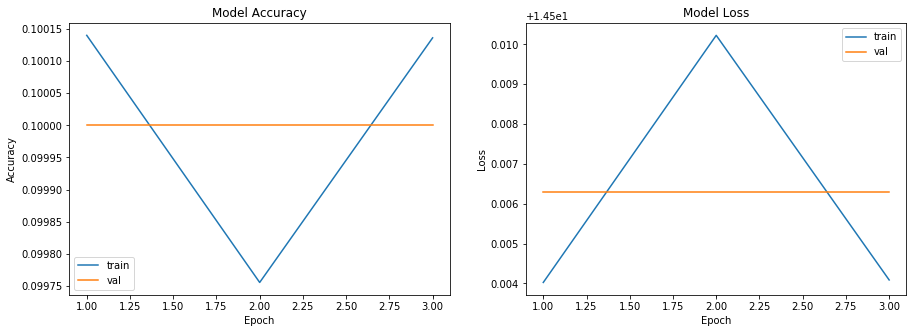

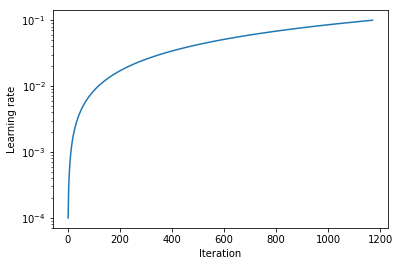

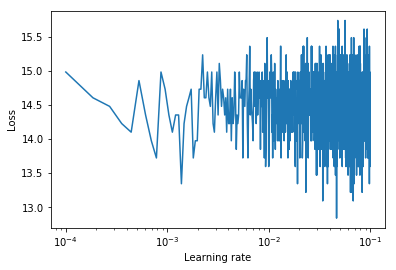

In [46]:
from keras.preprocessing.image import ImageDataGenerator
epoch_size = 3
batch_size = 128
reinit()
modelDefine()
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
lr_finder = LRFinder(min_lr=0.0001, max_lr=0.1, steps_per_epoch=np.ceil(50000/batch_size), epochs=epoch_size)
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch_size, 
                                 validation_data = (test_features, test_labels), callbacks=[lr_finder],verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
lr_finder.plot_lr()
lr_finder.plot_loss()

# SDG with No Momentum

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
epoch_size = 100
batch_size = 128
reinit()
modelDefine()
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
# train the model
start = time.time()
# Train the model
sgd = optimizers.SGD(lr=0.1, momentum=0.8, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch_size, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()


C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100
390/390 [==============================] - 8s 19ms/step - loss: 14.5085 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5027 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5038 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5122 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5084 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
390/390 [==============================] - 7s 18ms/step - loss: 14.4935 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5126 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/100
390/390 [===========================

Epoch 61/100
390/390 [==============================] - 7s 19ms/step - loss: 14.5186 - acc: 0.0992 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 62/100
390/390 [==============================] - 7s 18ms/step - loss: 14.4941 - acc: 0.1008 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 63/100
390/390 [==============================] - 7s 19ms/step - loss: 14.5009 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 64/100
390/390 [==============================] - 7s 19ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 65/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5104 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100
390/390 [==============================] - 7s 18ms/step - loss: 14.4989 - acc: 0.1005 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 67/100
390/390 [==============================] - 7s 18ms/step - loss: 14.5064 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 68/100
390/390 [===================

 # SGD with Momentum and Keeping verbose to 0 

C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
C:\Balaji\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=0, steps_per_epoch=390, epochs=100)`
  app.launch_new_instance()


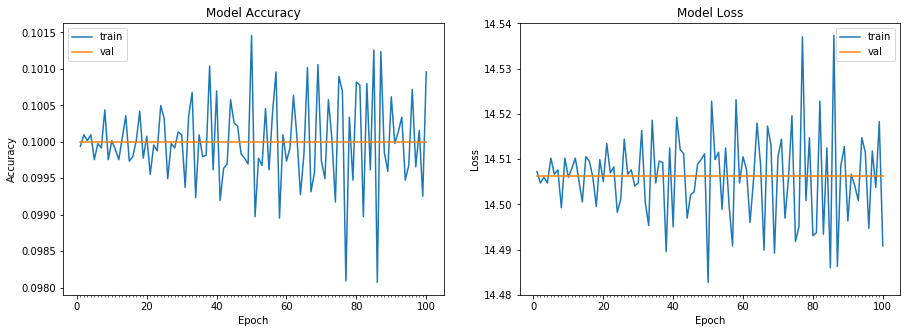

Accuracy on test data is: 10.00


In [56]:

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
epoch_size = 100
batch_size = 128
reinit()
modelDefine()
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False,preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))
# train the model
start = time.time()
# Train the model
sgd = optimizers.SGD(lr=0.1, momentum=0.8, decay=0.0, nesterov=False)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = epoch_size, 
                                 validation_data = (test_features, test_labels), verbose=0 )
end = time.time()
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


In [83]:
reinit()
predicted = model.predict(train_features)    

    
    



[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
